# Flight Fare Prediction
## DEPI - Microsoft Machine Learning - Final Project
### Created by Dalia Refaat, Dataset from www.rpubs.com/LXY_23054201/1136559

# ----------------------------
### Data Preprocessing and Analysis
# ----------------------------

### Required Imports

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [290]:
df = pd.read_excel("data/flights_data.xlsx")

### Analyzing Data

In [292]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [294]:
print("Columns, rows on data is:", df.shape)

Columns, rows on data is: (10683, 11)


In [295]:
dups = df.duplicated().sum()

In [296]:
print("Duplicates on the dataset:", dups)

Duplicates on the dataset: 220


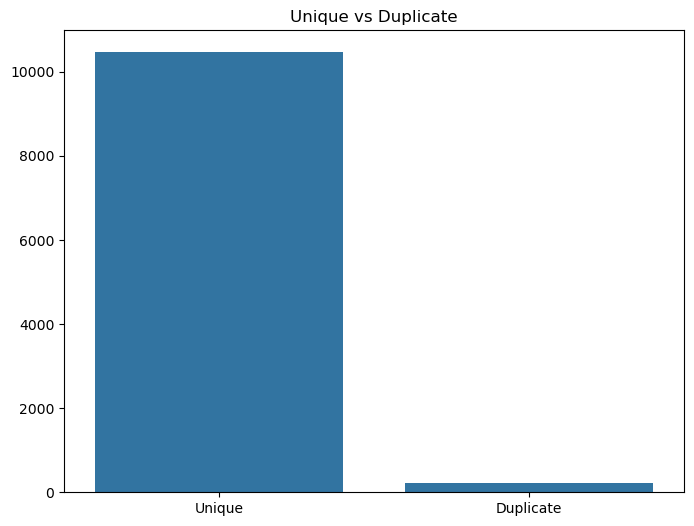

In [297]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Unique', 'Duplicate'], y=[len(df) - dups, dups])
plt.title('Unique vs Duplicate')
plt.show()

In [298]:
df = df.drop_duplicates()

In [299]:
from sklearn.impute import SimpleImputer

NumData = df.select_dtypes(include=[np.number]).columns
CatData = df.select_dtypes(exclude=[np.number]).columns

MissCount = df.isnull().sum().sum()
TotalRows = len(df)
MissingPercentage = MissCount / TotalRows * 100

if MissingPercentage < 5:
    NumImputer = SimpleImputer(strategy='median')
    df[NumData] = NumImputer.fit_transform(df[NumData])
    
    CatsImputer = SimpleImputer(strategy='most_frequent')
    df[CatData] = CatsImputer.fit_transform(df[CatData])
else:
    print("High percentage of missing values:", round(MissingPercentage, 2), "%")
    df.dropna(inplace=True)

print("Rows with missing values:", MissCount)
print("Percentage of rows with missing values:", round(MissingPercentage, 2), "%")

Rows with missing values: 2
Percentage of rows with missing values: 0.02 %


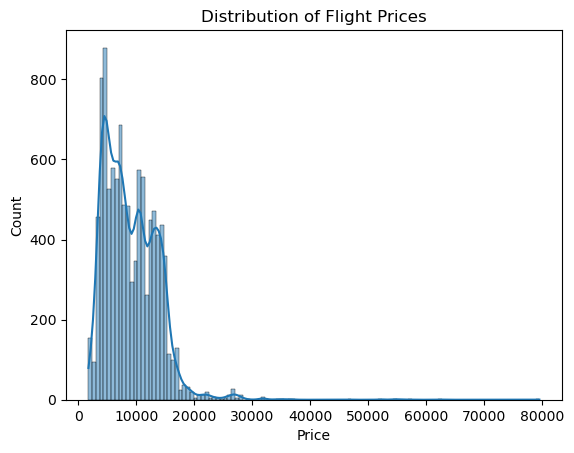

In [300]:
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.show()

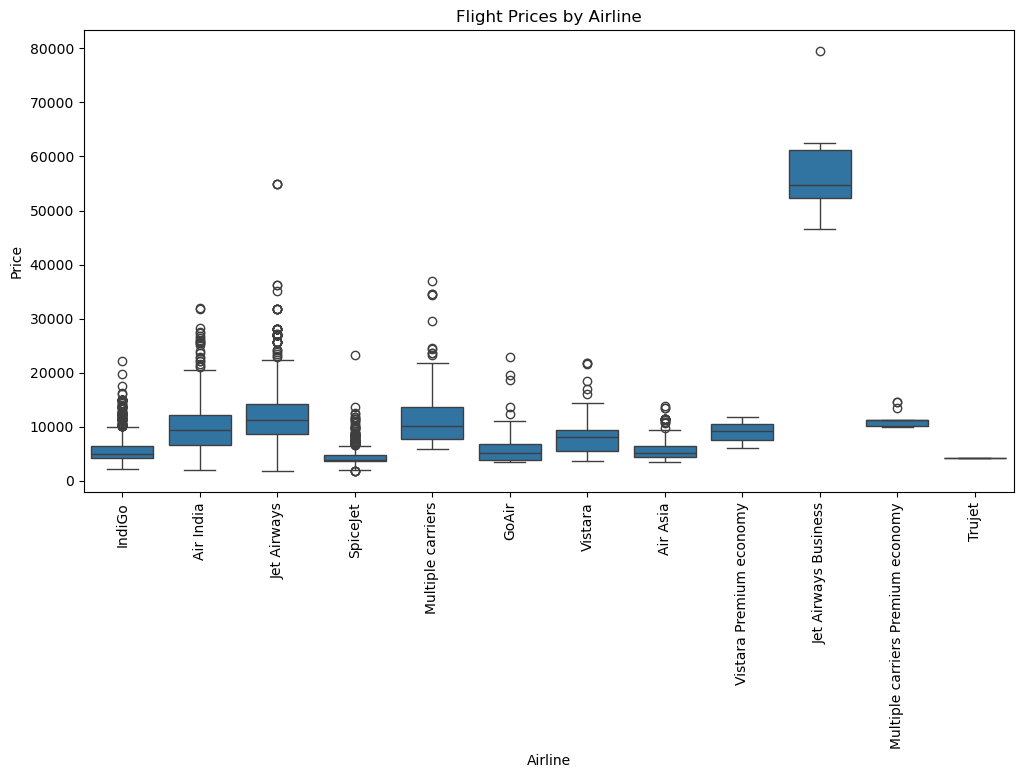

In [301]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Flight Prices by Airline')
plt.show()

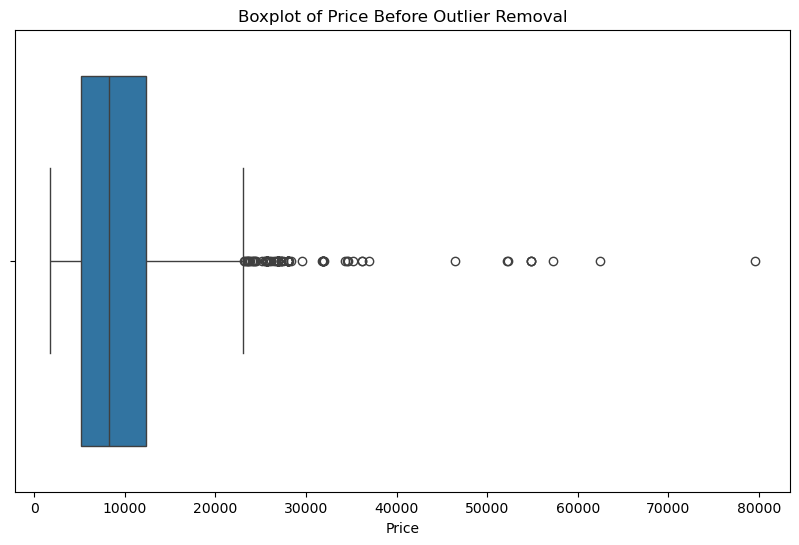

In [302]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price Before Outlier Removal')
plt.show()

In [303]:
QuartileOne = df['Price'].quantile(0.25)
QuartileThree = df['Price'].quantile(0.75)
IQR = QuartileThree - QuartileOne
LowerBound = QuartileOne - 1.5 * IQR
UpperBound = QuartileThree + 1.5 * IQR
df = df[(df['Price'] >= LowerBound) & (df['Price'] <= UpperBound)]

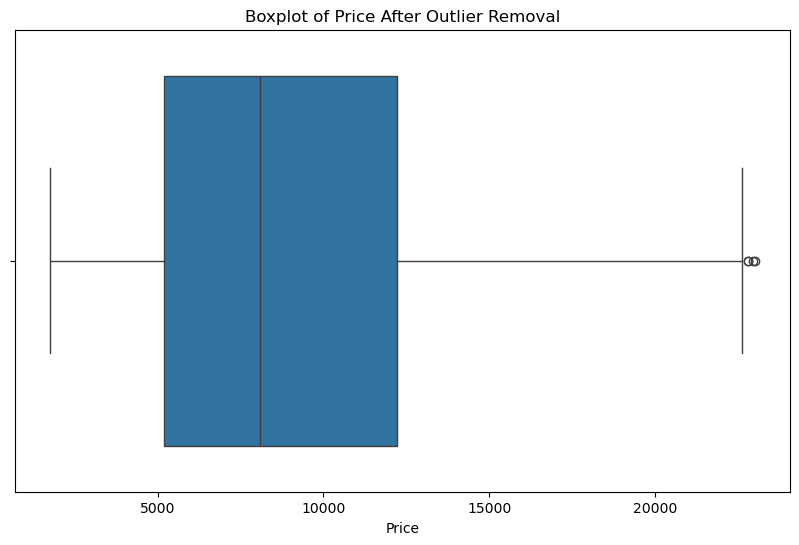

In [304]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price After Outlier Removal')
plt.show()

In [305]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month
df['Journey_weekday'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.weekday
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [306]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [307]:
Duration = list(df["Duration"])

for i in range(len(Duration)):
    if "h" not in Duration[i]:
        Duration[i] = "0h " + Duration[i]
    elif "m" not in Duration[i]:
        Duration[i] = Duration[i] + " 0m" 

DurationHours = []
DurationMins = []

for i in range(len(Duration)):
    hours = int(Duration[i].split('h')[0].strip())
    minutes = int(Duration[i].split('h')[1].replace('m', '').strip())
    DurationHours.append(hours)
    DurationMins.append(minutes)

In [308]:
df["Duration_hours"] = DurationHours
df["Duration_mins"] = DurationMins

In [309]:
minutes = []
for hours in df['Duration_hours']:
    minutes.append(hours * 60)

df['minutes'] = minutes

df.drop(columns=['Duration_hours'], inplace=True)

In [310]:
df['minutes'] = df['minutes'] + df['Duration_mins']
df.drop(["Duration_mins"], axis = 1, inplace = True)

In [311]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [312]:
df = df.drop(['Date_of_Journey', 'Duration', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], axis=1)

In [313]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,24,3,6,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,1,5,2,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,9,6,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,12,5,6,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,1,3,4,16,50,21,35,285


In [314]:
df['Price_per_stop'] = df['Price'] / (df['Total_Stops'] + 1)
df['Is_weekend'] = df['Journey_weekday'].isin([5, 6]).astype(int)
df['Is_night_flight'] = ((df['Dep_hour'] >= 20) | (df['Dep_hour'] <= 5)).astype(int)

In [315]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops          int64
Price              float64
Journey_day          int32
Journey_month        int32
Journey_weekday      int32
Dep_hour             int32
Dep_min              int32
Arrival_hour         int32
Arrival_min          int32
minutes              int64
Price_per_stop     float64
Is_weekend           int32
Is_night_flight      int32
dtype: object

In [316]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [317]:
CategoricalColumns = df.select_dtypes(include=['object']).columns
print(CategoricalColumns)

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')


In [318]:
NumericalColumns = df.select_dtypes(exclude=['object']).columns
print(NumericalColumns)

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Journey_weekday', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'minutes', 'Price_per_stop', 'Is_weekend', 'Is_night_flight'],
      dtype='object')


In [319]:
Categorical=df[CategoricalColumns]
Categorical.head()

,Airline,Source,Destination,Route
0,IndiGo,Banglore,New Delhi,BLR → DEL
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL


In [320]:
print(f'Unique values in Airline: {len(df["Airline"].unique())}')
Airline = pd.get_dummies(df[['Airline']], drop_first=True)
print(Airline.head())

print(f'Value counts for Source:\n{df["Source"].value_counts()}')
Source = pd.get_dummies(df[['Source']], drop_first=True)
print(Source.head())

print(f'Value counts for Destination:\n{df["Destination"].value_counts()}')
Destination = pd.get_dummies(df[['Destination']], drop_first=True)
print(Destination.head())

Unique values in Airline: 11
   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              False          False            True                False   
1               True          False           False                False   
2              False          False           False                 True   
3              False          False            True                False   
4              False          False            True                False   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                      False                                      False   
1                      False                                      False   
2                      False                                      False   
3                      False                                      False   
4                      False                                      False   

   Airline_SpiceJet  Airline_Trujet  Airline_Vistara  \
0      

In [321]:
RouteColumns = Categorical['Route'].str.split('→', expand=True)

for i in range(RouteColumns.shape[1]):
    RouteColumns.rename(columns={i: f'Route {i + 1}'}, inplace=True)

for j in RouteColumns.columns:
    RouteColumns[j] = RouteColumns[j].fillna('None').astype(str)

Categorical = pd.concat([Categorical, RouteColumns], axis=1)

for feature in Categorical.columns:
    UniqueCounter = len(Categorical[feature].value_counts())
    print(f'{feature} has total {UniqueCounter} categories\n')

for i in RouteColumns.columns:
    Categorical[i] = encoder.fit_transform(Categorical[i].astype(str))

Airline has total 11 categories

Source has total 5 categories

Destination has total 6 categories

Route has total 126 categories

Route 1 has total 5 categories

Route 2 has total 45 categories

Route 3 has total 30 categories

Route 4 has total 14 categories

Route 5 has total 6 categories

Route 6 has total 2 categories



In [322]:
ColumnsToDrop = ['Date_of_Journey', 'Duration', 'Dep_Time', 'Arrival_Time', 'Additional_Info']

In [323]:
df=pd.concat([Categorical, Airline, Source, Destination, df[NumericalColumns]], axis=1)
df.head()

,Airline,Source,Destination,Route,Route 1,Route 2,Route 3,Route 4,Route 5,Route 6,...,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,minutes,Price_per_stop,Is_weekend,Is_night_flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,13,29,13,5,1,...,3,6,22,20,1,10,170,3897.000000,1,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,25,1,3,5,1,...,5,2,5,50,13,15,445,2554.000000,0,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,3,32,4,5,5,1,...,6,6,9,25,4,25,1140,4627.333333,1,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2,34,3,13,5,1,...,5,6,18,5,23,30,325,3109.000000,1,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,0,34,8,13,5,1,...,3,4,16,50,21,35,285,6651.000000,0,0


In [324]:
df.drop(['Airline', 'Source', 'Destination','Route'], axis=1, inplace=True)

In [325]:
df.to_excel('data/cleaned_data.xlsx', index=False)

# ----------------------------
### Model Development
# ----------------------------

In [327]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

In [328]:
df = pd.read_excel('data/cleaned_data.xlsx')

In [329]:
MedianPrice = df['Price'].median()

for i in range(len(df)):
    if df['Price'][i] >= 40000:
        df['Price'][i] = MedianPrice

In [330]:
X = df.drop('Price', axis=1)
y = df['Price']

In [331]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

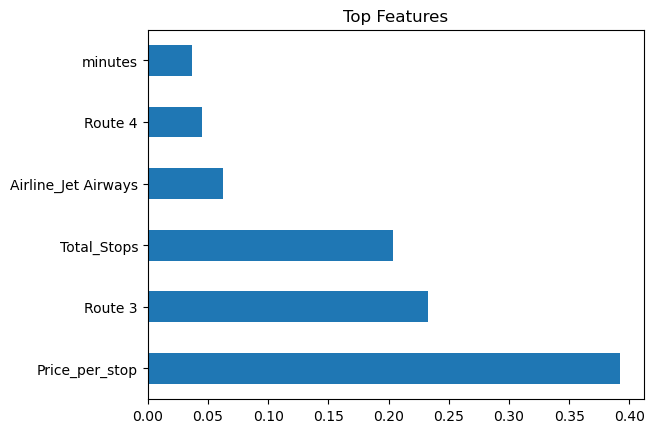

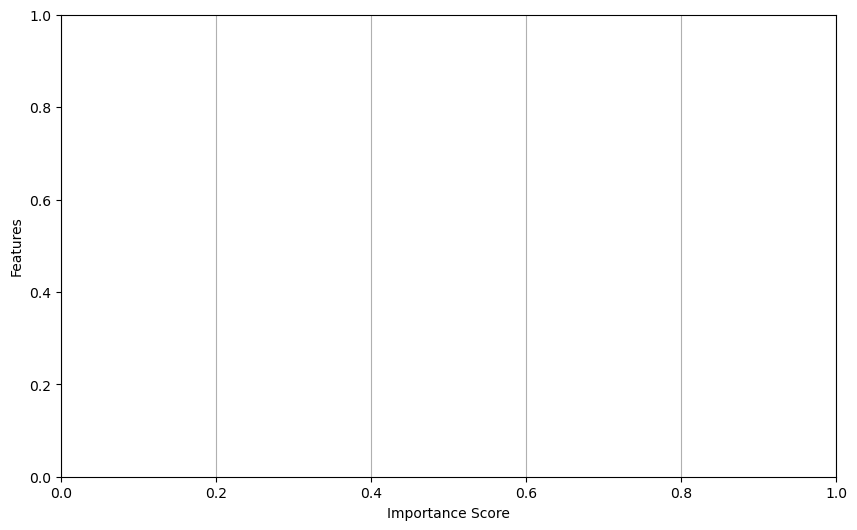

In [332]:
FeatureImportance = pd.Series(data=selection.feature_importances_, index=X.columns)

TopFeatures = FeatureImportance.nlargest(6)

TopFeatures.plot(kind='barh', title='Top Features')

plt.figure(figsize=(10, 6))
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

In [333]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [334]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
RFModel = RandomForestRegressor()
RFModel.fit(X_train, y_train)

RandomForestRegressor()

In [335]:
y_pred = RFModel.predict(X_test)

In [336]:
RFModel.score(X_train, y_train)

0.9997408362924844

In [337]:
RFModel.score(X_test, y_test)

0.9981729304793696

In [338]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [339]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred)
CVScores = cross_val_score(RFModel, X_train, y_train, cv=5, scoring='r2')
MEANCVR2 = CVScores.mean()

In [340]:
print(f"MAE: {MAE:.4f}")
print(f"MSE: {MSE:.4f}")
print(f"RMSE: {RMSE:.4f}")
print(f"R²: {R2:.4f}")
print(f"Mean CV R²: {MEANCVR2:.4f}")

MAE: 12.3315
MSE: 30658.8027
RMSE: 175.0966
R²: 0.9982
Mean CV R²: 0.9974


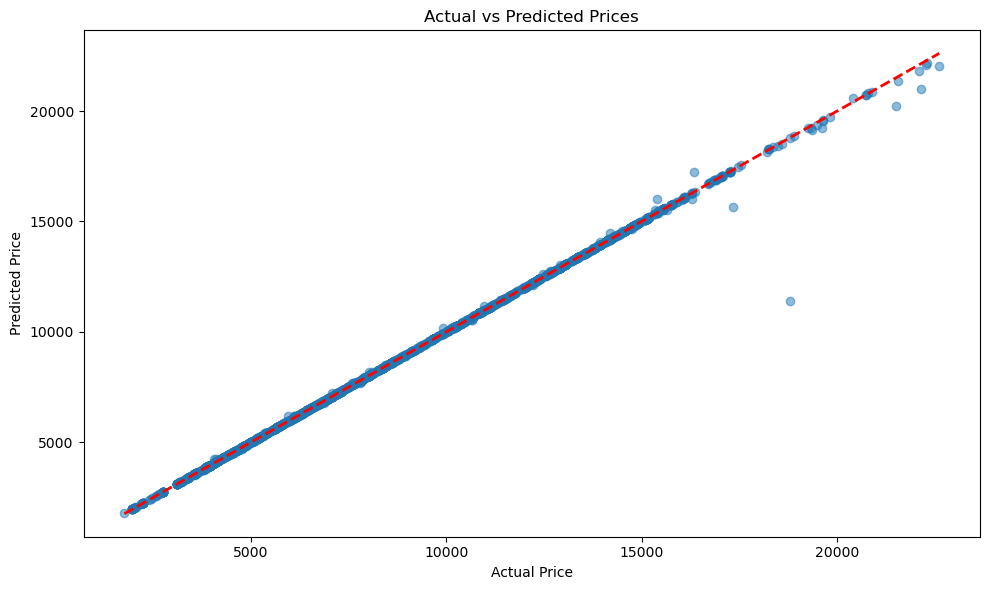

In [341]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.tight_layout()
plt.show()

In [342]:
import joblib

joblib.dump(RFModel, 'model.joblib')
print("Model saved.")

Model saved.


# ----------------------------
### Generative Adversarial Networks (GANs)
# ----------------------------

In [344]:
df.dtypes

Route 1                                        int64
Route 2                                        int64
Route 3                                        int64
Route 4                                        int64
Route 5                                        int64
Route 6                                        int64
Airline_Air India                               bool
Airline_GoAir                                   bool
Airline_IndiGo                                  bool
Airline_Jet Airways                             bool
Airline_Multiple carriers                       bool
Airline_Multiple carriers Premium economy       bool
Airline_SpiceJet                                bool
Airline_Trujet                                  bool
Airline_Vistara                                 bool
Airline_Vistara Premium economy                 bool
Source_Chennai                                  bool
Source_Delhi                                    bool
Source_Kolkata                                

In [345]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

In [346]:
NumericalColumns = df.select_dtypes(include=[np.number]).columns
BoolColumns = df.select_dtypes(include=[bool]).columns

In [347]:
Scaler = MinMaxScaler(feature_range=(-1, 1))
Scaled = pd.DataFrame(Scaler.fit_transform(df[NumericalColumns]), columns=NumericalColumns)

In [348]:
for j in BoolColumns:
    Scaled[j] = df[j].astype(int)

In [349]:
InputSize = 100
OutputSize = len(Scaled.columns)

In [350]:
def CustomActivation(x):
    NumericalOutput = tf.nn.tanh(x[:, :len(NumericalColumns)])
    BoolOutput = tf.nn.sigmoid(x[:, len(NumericalColumns):])
    return tf.concat([NumericalOutput, BoolOutput], axis=1)

In [351]:
Generator = keras.Sequential([
    layers.Dense(128, input_shape=(InputSize,), activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(OutputSize, activation=CustomActivation)
])

In [352]:
Discriminator = keras.Sequential([layers.Dense(512, input_shape=(OutputSize,), activation='leaky_relu'), 
                                  layers.Dense(256, activation='leaky_relu'), layers.Dense(128, activation='leaky_relu'), 
                                  layers.Dense(1, activation='sigmoid')
])

In [353]:
CrossEntropy = keras.losses.BinaryCrossentropy(from_logits=False)
GeneratorOptimizer = keras.optimizers.Adam(1e-4)
DiscriminatorOptimizer = keras.optimizers.Adam(1e-4)

@tf.function
def train_step(real_data):
    BatchSize = tf.shape(real_data)[0]
    Noise = tf.random.normal([BatchSize, InputSize])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        GenData = Generator(Noise, training=True)
        RealOutput = Discriminator(real_data, training=True)
        FakeOutput = Discriminator(GenData, training=True)
        GeneratorLoss = CrossEntropy(tf.ones_like(FakeOutput), FakeOutput)
        DiscriminatorLoss = CrossEntropy(tf.ones_like(RealOutput), RealOutput) + CrossEntropy(tf.zeros_like(FakeOutput), FakeOutput)
        
    GradsOfGenerator = gen_tape.gradient(GeneratorLoss, Generator.trainable_variables)
    GradsOfDiscriminator = disc_tape.gradient(DiscriminatorLoss, Discriminator.trainable_variables)
    GeneratorOptimizer.apply_gradients(zip(GradsOfGenerator, Generator.trainable_variables))
    DiscriminatorOptimizer.apply_gradients(zip(GradsOfDiscriminator, Discriminator.trainable_variables))

In [354]:
EPOCHS = 100
BATCH_SIZE = 32

for epoch in range(EPOCHS):
    dataset = tf.data.Dataset.from_tensor_slices(Scaled.values.astype('float32')).shuffle(1000).batch(BATCH_SIZE)
    
    for batch in dataset:
        train_step(batch)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{EPOCHS}')

NumSamples = 1000
Noise = tf.random.normal([NumSamples, InputSize])
Data = Generator(Noise).numpy()

Epoch 10/100
Epoch 20/100
Epoch 30/100
Epoch 40/100
Epoch 50/100
Epoch 60/100
Epoch 70/100
Epoch 80/100
Epoch 90/100
Epoch 100/100


In [355]:
DataUnscaled = pd.DataFrame(Data, columns=Scaled.columns)

DataUnscaled[NumericalColumns] = Scaler.inverse_transform(DataUnscaled[NumericalColumns])

for j in BoolColumns:
    DataUnscaled[j] = np.round(DataUnscaled[j]).astype(bool)

for j in NumericalColumns:
    DataUnscaled[j] = DataUnscaled[j].clip(df[j].min(), df[j].max())

print(DataUnscaled.head())

    Route 1    Route 2    Route 3    Route 4   Route 5   Route 6  Total_Stops  \
0  2.769877  15.733093   5.332661  12.999846  4.999919  0.999987     0.955412   
1  2.989418  12.508264   6.050328  12.999704  4.999967  0.999905     1.031536   
2  0.635438  13.025566  27.039413  12.997501  5.000000  1.000000     0.193735   
3  2.971128   7.348022   6.328436  12.995562  4.999921  0.999994     1.073811   
4  3.013251   7.350163   6.229898  12.999584  4.999984  0.999989     1.043313   

          Price  Journey_day  Journey_month  ...  \
0   4103.463379    13.925382       3.001813  ...   
1   6276.295898    12.999654       5.301211  ...   
2   6727.857422     8.095919       3.034415  ...   
3  12729.229492    15.627254       3.886212  ...   
4   6000.392578     7.911933       3.710934  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                            False           False          True   
1                            False           False          True

In [356]:
DataUnscaled.to_excel('data/generated_data.xlsx', index=False)
print("Generated Data saved.'")

Generated Data saved.'
